<a href="https://colab.research.google.com/github/dimaszuda/LFP_Battery_SoC_Prediction/blob/main/Projek_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
dataframe = pd.ExcelFile("ChargeDischarge 18650.xlsx").parse('record')

In [ ]:
dataframe

,CycleID,Step_Type,C_Rate,Voltage(V),Current(mA),Cap(mAh),SoC (%)
0,1,CC_Chg,0.503168,3.32923,899.479,0.00000,0.000
1,1,CC_Chg,0.503113,3.33115,899.380,0.24983,0.014
2,1,CC_Chg,0.503113,3.33414,899.380,0.49966,0.028
3,1,CC_Chg,0.503113,3.33697,899.380,0.74951,0.042
4,1,CC_Chg,0.503168,3.33905,899.479,0.99937,0.056
...,...,...,...,...,...,...,...
219188,25,Rest,0.000000,2.58541,0.000,-1747.64000,0.127
219189,25,Rest,0.000000,2.58566,0.000,-1747.64000,0.127
219190,25,Rest,0.000000,2.58608,0.000,-1747.64000,0.127
219191,25,Rest,0.000000,2.58641,0.000,-1747.64000,0.127


In [ ]:
dataframe.head(2)

,CycleID,Step ID,Step Type,Record ID,C_Rate,Time(h:m:s:ms:us),Voltage(V),Current(mA),Cap(mAh),Energy(mWh),Power(mW),DCIR(mO),Realtime,Filled Capacity,SoC (%)
0,1,1,CC_Chg,1,0.503168,0:00:00:000.000,3.32923,899.479,0.00000,0.00000,2994.58,0,2022-04-18 14:40:44:000.000,0.000000,0.000
1,1,1,CC_Chg,2,0.503113,0:00:01:000.000,3.33115,899.380,0.24983,0.83221,2995.97,0,2022-04-18 14:40:45:000.000,0.249828,0.014


In [ ]:
dataframe.drop(dataframe.columns[[1, 3, 5, 9, 10, 11, 12, 13]], axis=1, inplace=True)

In [ ]:
dataframe = dataframe.rename(columns= {'Step Type' : 'Step_Type'})

In [ ]:
dataframe.isna().sum()

CycleID          0
Step_Type        0
C_Rate           0
Voltage(V)       0
Current(mA)      0
Cap(mAh)         0
SoC (%)        903
dtype: int64

In [ ]:
dataframe = dataframe.dropna()

In [ ]:
dataframe = dataframe.drop_duplicates()

In [ ]:
dataframe.head(2)

,CycleID,Step_Type,C_Rate,Voltage(V),Current(mA),Cap(mAh),SoC (%)
0,1,CC_Chg,0.503168,3.32923,899.479,0.00000,0.000
1,1,CC_Chg,0.503113,3.33115,899.380,0.24983,0.014


In [ ]:
def outlier(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lwr = Q1 - (1.5*IQR)
  upr = Q3 + (1.5*IQR)
  return lwr, upr

In [ ]:
font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'bold'
        }

In [ ]:
def plot_outlier(data, column):
  fig, ax = plt.subplots(figsize=(6, 4))
  ax.set_title('Data Outlier')
  ax.boxplot(data)
  ax.set_aspect(1.5, anchor='C')
  ax.set_xticks([y+1 for y in range(len(data))], labels=['Original Data', 'removed outlier', 'fully removed'])
  ax.set_xlabel(column, fontdict=font)
  plt.show()

In [ ]:
lwr, upr = outlier(dataframe, 'Voltage(V)')
dataframe1 = dataframe[~((dataframe['Voltage(V)'] < lwr) | (dataframe['Voltage(V)'] > upr))]

In [ ]:
lwr, upr = outlier(dataframe1, 'Voltage(V)')
dataframe2 = dataframe1[~((dataframe1['Voltage(V)'] < lwr) | (dataframe1['Voltage(V)'] > upr))]

In [ ]:
lwr, upr = outlier(dataframe2, 'Voltage(V)')
dataframe3 = dataframe2[~((dataframe2['Voltage(V)'] < lwr) | (dataframe2['Voltage(V)'] > upr))]

In [ ]:
df1 = dataframe1['Voltage(V)']
df2 = dataframe2['Voltage(V)']
df3 = dataframe3['Voltage(V)']
sample = [df1, df2, df3]

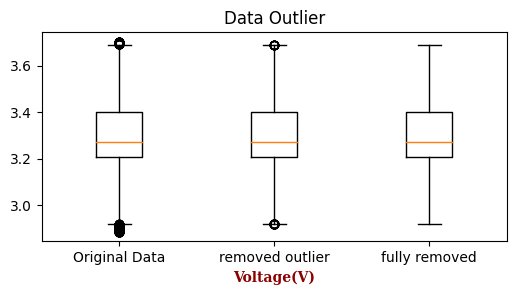

In [ ]:
plot_outlier(sample, 'Voltage(V)')

In [ ]:
charge = dataframe3[(dataframe3['Step_Type'] == 'CC_Chg')]

In [ ]:
discharge = dataframe3[(dataframe3['Step_Type'] == 'CC_DChg')]

In [ ]:
cc_dc = charge.append(discharge)

<ipython-input-128-b48ebb0d9bb2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cc_dc = charge.append(discharge)


In [ ]:
save = cc_dc.to_excel('Data Bersih.xlsx', index=False)